# Natural Language Processing

In [1]:
# Importamos las librerias necesarias para realizar el trabajo propuesto
import re
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pydot
import text2emotion as te
import PIL.Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\puil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\puil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\puil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
from wordcloud import WordCloud
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from IPython.display import Image

In [3]:
## Leemos el excel
PATH = "/Users/puil/OneDrive/Escritorio/EAE/Data science y machine learning/Practica/Practica 7 Natural Language Processing/Ejercicio/6.9. EmployeeData.xlsx"

df = pd.read_excel(PATH)


In [4]:
display(df)
# Mostramos en un dataframe el contenido

,CanDoBetter,ID,Training,Est_Income,Benefit,length_of_hire,Facility,DriveTime,Marital,SpousalBenefit,StockPlan,TrainingRecieved,PositionType,Education,Status
0,better non-monetary benefits.,2181.0,Y,60095.20000,Y,58.479532,Facility A,More than 90 mnts,Married,Yes,Yes,No,Sales,"Associate, High school, or Certification",Current
1,company outings,2829.0,Y,47049.07979,N,35.714286,Facility B,0-30 mnts,Married,Yes,No,Yes,Sales,"Associate, High school, or Certification",Current
2,"Having more safety meeting, and discussing wha...",2144.0,Y,60724.12250,Y,17.152659,Facility B,60-90 mnts,Married,Yes,Yes,Yes,Sales,Masters Degree,Past
3,careerpromotions,1356.0,N,63784.21843,Y,5.271481,Facility A,More than 90 mnts,Married,Yes,No,No,Sales,"Associate, High school, or Certification",Past
4,careerpromotions,2807.0,N,87665.23353,N,4.244482,Facility A,More than 90 mnts,Married,Yes,Yes,No,Sales,"Doctorate (PhD, EdD, etc)",Past
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,pay,2632.0,N,93322.10000,Y,3.342246,Facility A,0-30 mnts,Status Unknown,No,Yes,No,Non-Managerial/ Professional,Masters Degree,Past
1713,pay,2119.0,N,93322.10000,Y,3.342246,Facility A,0-30 mnts,Status Unknown,No,Yes,No,Non-Managerial/ Professional,Masters Degree,Past
1714,listen and take action,2896.0,N,93322.10000,Y,3.342246,Facility A,0-30 mnts,Status Unknown,No,No,No,Non-Managerial/ Professional,Masters Degree,Past
1715,pay more,2388.0,N,93322.10000,Y,3.342246,Facility A,0-30 mnts,Status Unknown,No,Yes,No,Non-Managerial/ Professional,Masters Degree,Past


In [5]:
df['Status'].value_counts() / len (df)
# Verificamos si los datos están balanceados.

Current    0.552708
Past       0.446127
Name: Status, dtype: float64

In [6]:
df1 = df[(df["Status"] == "Past")]
df2 = df[(df["Status"] == "Current")]
# División entre los que fueron trabajadores y los que lo son actualmente

In [7]:
df.info()
# Información sobre cada una de las variables de la tabla

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1717 entries, 0 to 1716
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CanDoBetter       1689 non-null   object 
 1   ID                1715 non-null   float64
 2   Training          1715 non-null   object 
 3   Est_Income        1715 non-null   float64
 4   Benefit           1715 non-null   object 
 5   length_of_hire    1715 non-null   float64
 6   Facility          1715 non-null   object 
 7   DriveTime         1715 non-null   object 
 8   Marital           1715 non-null   object 
 9   SpousalBenefit    1715 non-null   object 
 10  StockPlan         1715 non-null   object 
 11  TrainingRecieved  1715 non-null   object 
 12  PositionType      1715 non-null   object 
 13  Education         1715 non-null   object 
 14  Status            1715 non-null   object 
dtypes: float64(3), object(12)
memory usage: 201.3+ KB


In [8]:
df.isnull().any().sum()
# Mostramos el total de nulos

15

In [9]:
df = df.dropna()
df.isnull().sum()

CanDoBetter         0
ID                  0
Training            0
Est_Income          0
Benefit             0
length_of_hire      0
Facility            0
DriveTime           0
Marital             0
SpousalBenefit      0
StockPlan           0
TrainingRecieved    0
PositionType        0
Education           0
Status              0
dtype: int64

# Sentimental Analisis

In [10]:
keys, values = zip(*df1["CanDoBetter"].items())
a = "EUR"
b = 1
keys = keys+(a,)
values = values+(b,)
print ("values : ", str(values))
# Vemos las palabras principales de aquello que se puede mejorar de la empresa por extrabajadores

values :  ('Having more safety meeting, and discussing what needed to be done before the day has started........Keeping an open line with all the employees I feel needs to happen in any job.', 'careerpromotions', 'careerpromotions', "I don't want to answer.", 'careerpromotions', 'Board members should listen more.', 'careerpromotions', 'pay should be even. If a new employee starts at a higher pays then employees who have been there for years and doing the same job is not right.', 'recognize good works', 'Boot out the "planning to retire any day, so could care less about the job and people" kind of bosses who still run the show.  Unfortunately, because it is government related, tenure is a big thing and they are "safe" until the end.', 'treat employees with respect', 'higher wage', "don't know", 'careerpromotions', 'careerpromotions', 'careerpromotions', 'careerpromotions', 'careerpromotions', "I'm satisfied as it is.", 'careerpromotions', 'careerpromotions', 'careerpromotions', 'careerp

In [11]:
values = str(values)
# Lo pasamos a string

In [12]:
def convertTuple(tup):
    str =  ''.join(tup)
    return str
  # Pasamos la lista a tupla

In [13]:
conv_values = convertTuple(values)


In [14]:
def lower_case(text):
    output_text = text.lower()
    return output_text
def delete_punctuation_I(text):
    output_text = re.sub('[^-9A-Za-z ]', '', text)
    return output_text
# Pasamos el texto en minúscula y lo ordenamos

In [15]:
def text_cleaning(text):

    transformed_text = lower_case(text)

    output_text = delete_punctuation_I(transformed_text)
    

    return(output_text)
# Borramos el pronombre I del texto

In [16]:
conv_values = text_cleaning(conv_values)


In [17]:
emotions1 = te.get_emotion(conv_values)
emotions1 


{'Happy': 0.11, 'Angry': 0.04, 'Surprise': 0.25, 'Sad': 0.13, 'Fear': 0.47}

In [18]:
emotions1 = pd.DataFrame(emotions1, index = ["Feelings"])
emotions1 

,Happy,Angry,Surprise,Sad,Fear
Feelings,0.11,0.04,0.25,0.13,0.47


<AxesSubplot:>

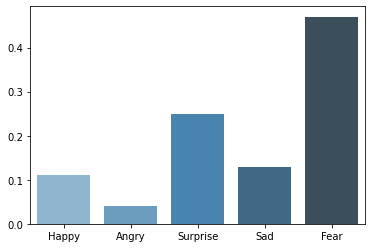

In [19]:
sns.barplot( data = emotions1 , palette="Blues_d" )

In [20]:
def word_cloud_generator(text):
    #image = WordCloud(background_color='white', colormap='Set2', collocations=False,).generate(text)
    image = WordCloud(width=3000,
                      height=2000,
                      background_color='black',
                      colormap='magma',
                      collocations=False ).generate(text)
    plt.figure(figsize=(40, 30))
    plt.axis("off")
    plt.imshow(image, interpolation='bilinear') 

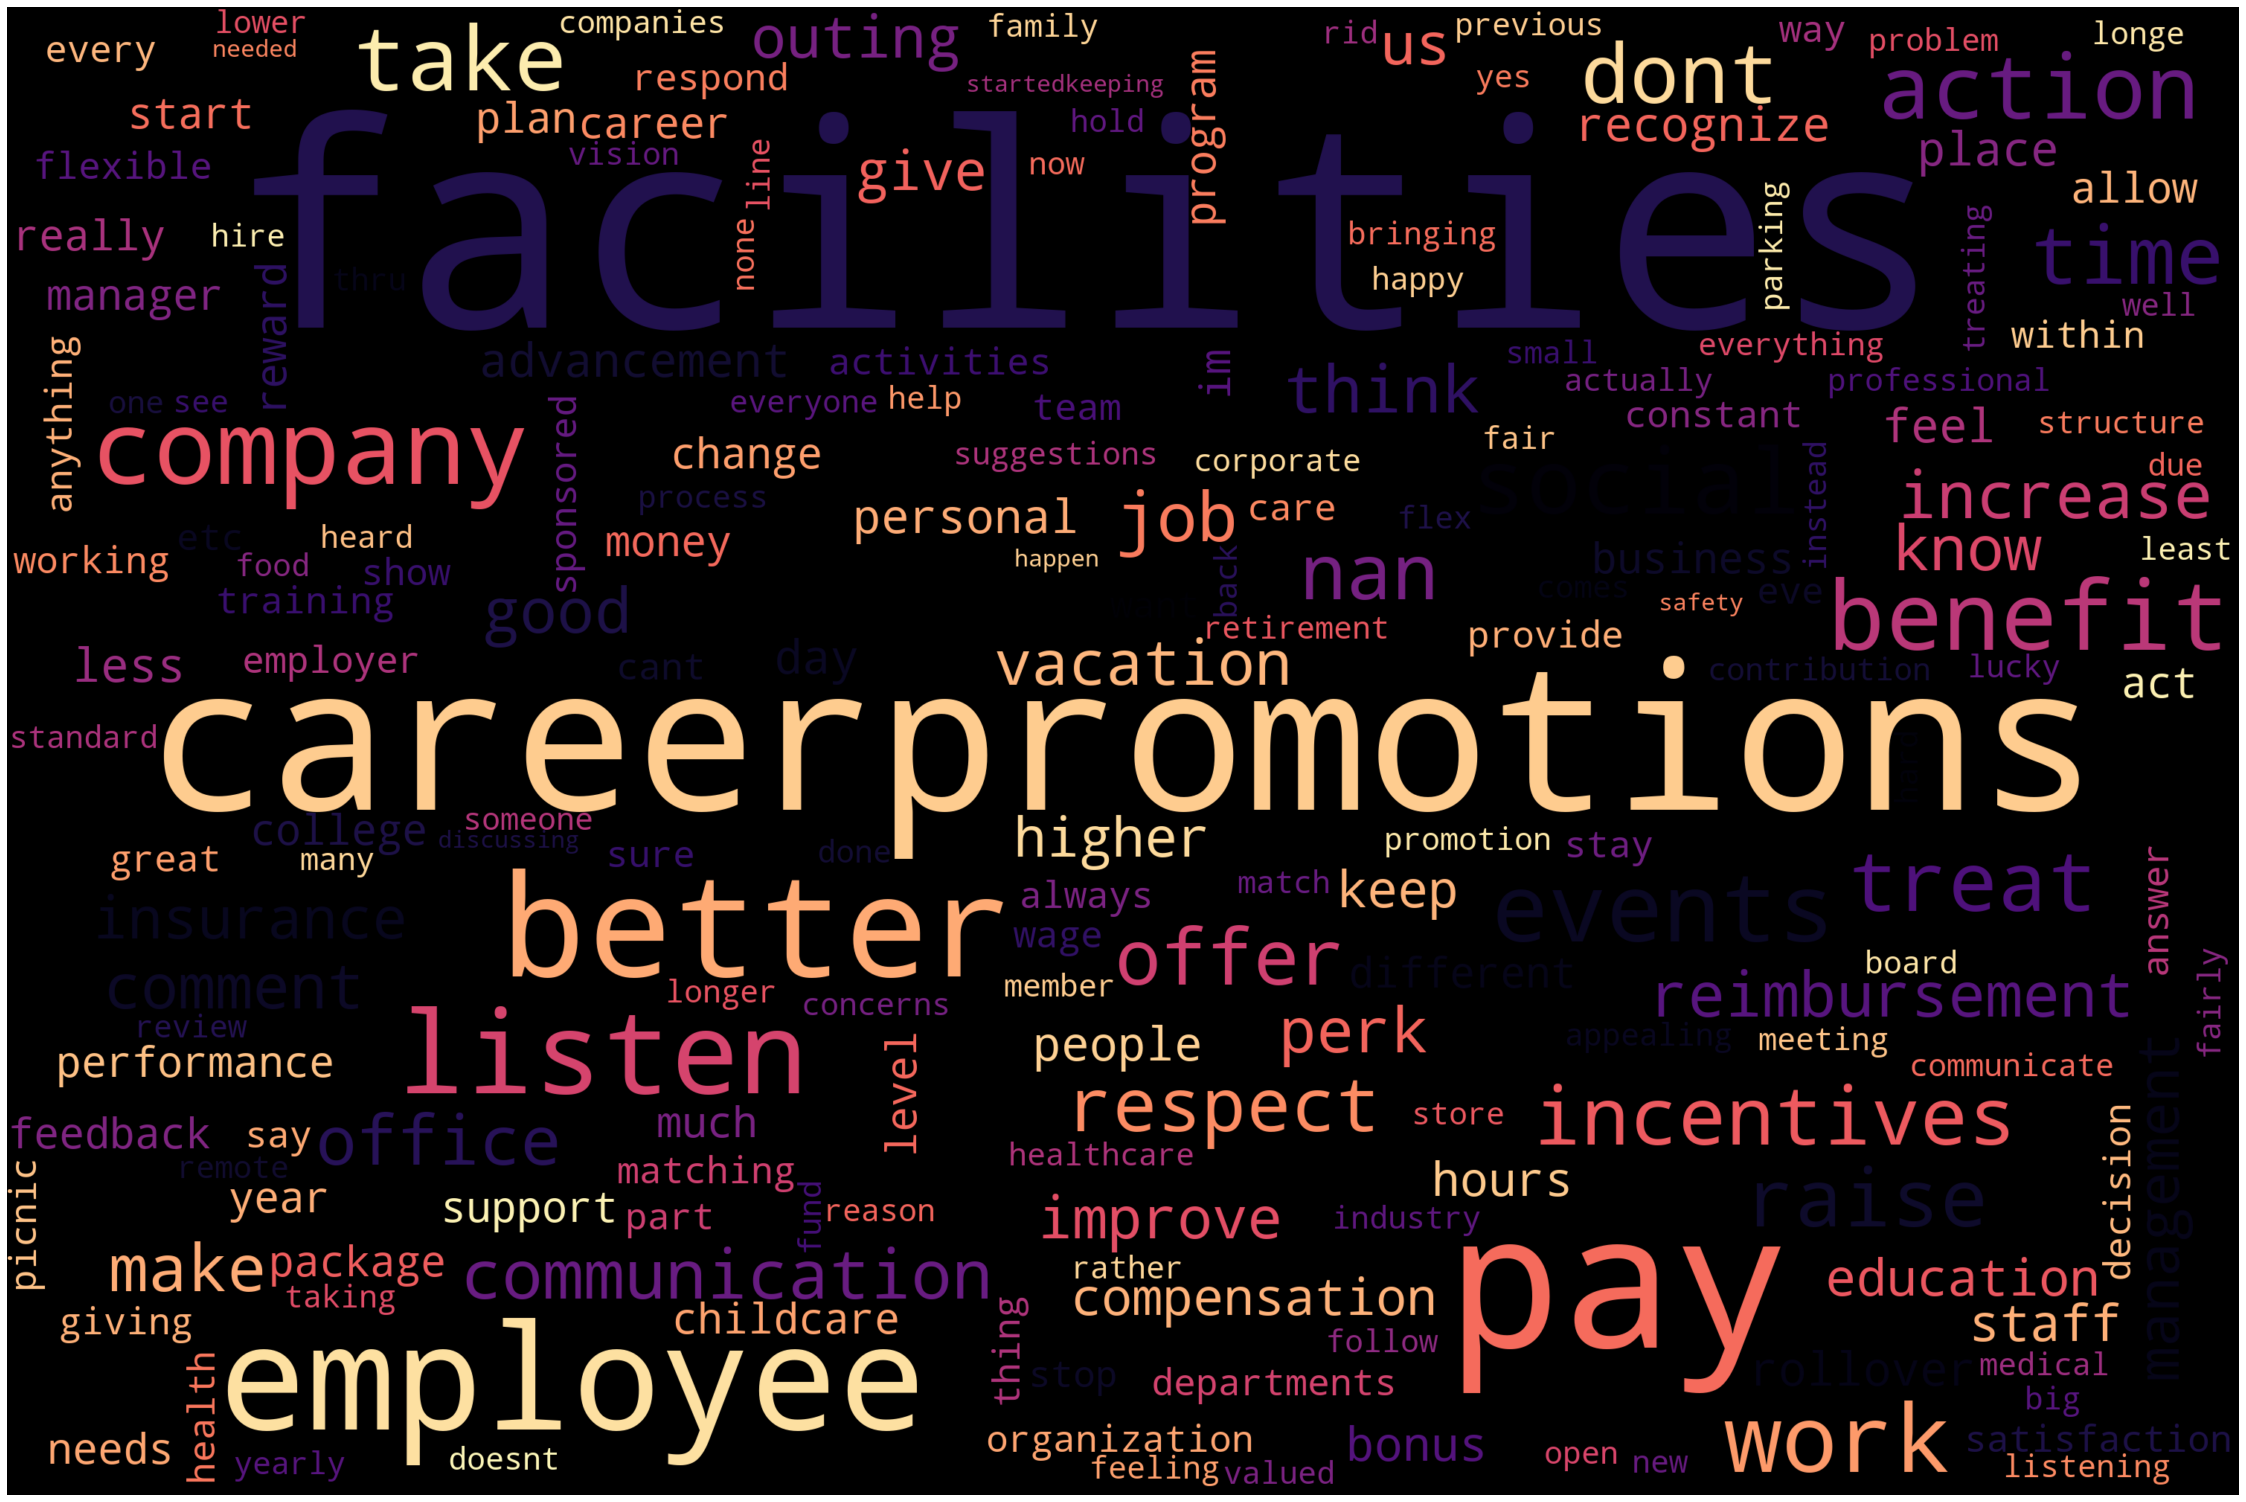

In [21]:
word_cloud_generator(conv_values)
# Ploteamos la nube de palabras de los extrabajadores

In [22]:
keys, values = zip(*df2["CanDoBetter"].items())
a = "EUR"
b = 1
keys1 = keys+(a,)
values1 = values+(b,)
print ("values : ", str(values1))
# Vemos las palabras principales de aquello que se puede mejorar de la empresa por trabajadores

values :  ('better non-monetary benefits.', 'company outings', 'pension', '401k, pension raise to industry standard', 'pension', 'nothing', 'nothing', 'pay more', "don't know", 'pay more', 'nothing', 'Higher pay.', 'pension', "They could communicate better and let us know what is going on when decisions are made.  Don't leave us in the dark", 'pay more', 'better pay', 'pension raised', 'pension', 'social events', 'be more focused on performance across the business thereby rewarding those who contribute most', 'listen to employees', 'We need more training in up-to-date skills.', 'periodic extra incentives', 'pension', 'listen and take action', 'nothing', 'pay more', 'listen to employees', 'nothing', 'nothing', 'nothing', 'more vacation time', 'pay more', 'better pay', 'pay more', 'more company sponsored after-work eve', 'nothing', 'better pay and incentives', 'rollover vacation time', 'give higher wages', 'cost of living raises, better insurance, appreciation', 'nothing', 'nothing', 'co

In [23]:
values1 = str(values1)
# Lo pasamos a string

In [24]:
conv_values1 = convertTuple(values1)


In [25]:
conv_values1 = text_cleaning(conv_values1)

In [26]:
emotions2 = te.get_emotion(conv_values1)

In [27]:
emotions2 = pd.DataFrame(emotions2, index = ["Feelings"])
emotions2 

,Happy,Angry,Surprise,Sad,Fear
Feelings,0.11,0.04,0.21,0.13,0.51


<AxesSubplot:>

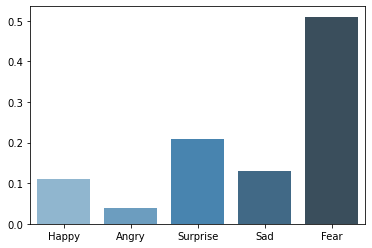

In [28]:
sns.barplot( data = emotions2 , palette="Blues_d" )

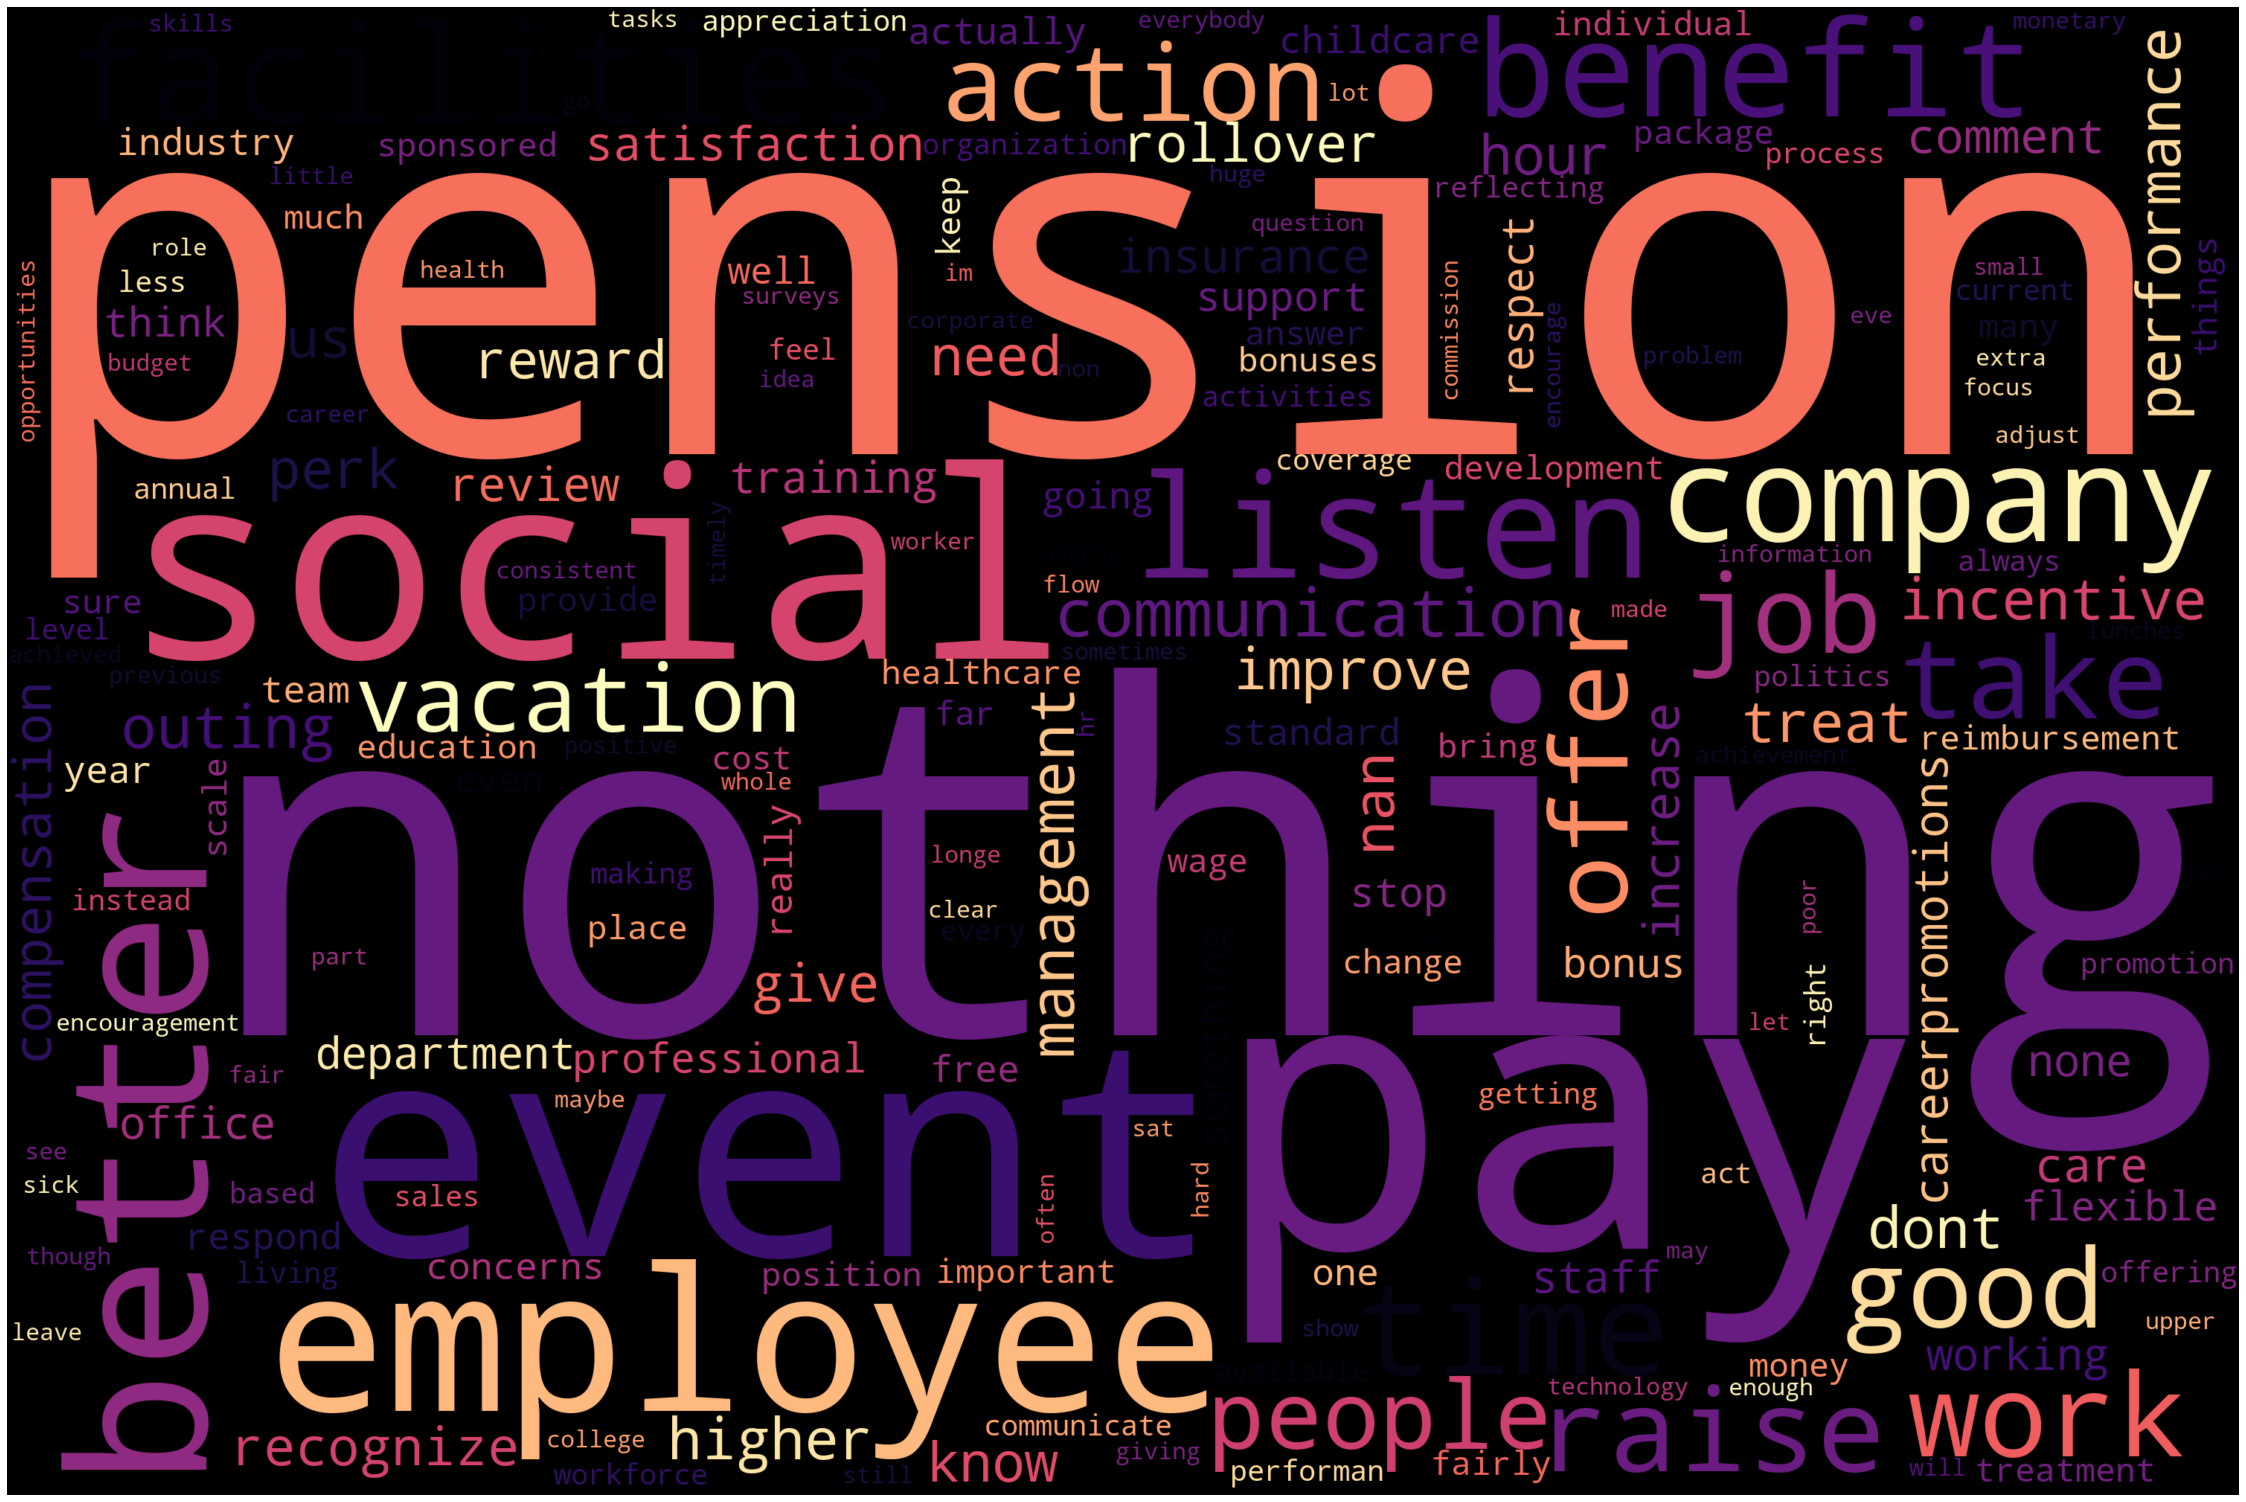

In [29]:
word_cloud_generator(conv_values1)
# Ploteamos la nube de palabras de los trabajadores

# Label Encoder

In [30]:
class MultiColumnLabelEncoder:

    def __init__(self, columns=None):
        self.columns = columns # array of column names to encode


    def fit(self, X, y=None):
        self.encoders = {}
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            self.encoders[col] = LabelEncoder().fit(X[col])
        return self


    def transform(self, X):
        output = X.copy()
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            output[col] = self.encoders[col].transform(X[col])
        return output


    def fit_transform(self, X, y=None):
        return self.fit(X,y).transform(X)


    def inverse_transform(self, X):
        output = X.copy()
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            output[col] = self.encoders[col].inverse_transform(X[col])
        return output

In [31]:
multi  = MultiColumnLabelEncoder(columns = ['Training', 'Benefit', 'Facility', 'DriveTime', 'Marital', 'SpousalBenefit','StockPlan', 'TrainingRecieved', 'PositionType', 'Education'])
# Seleccionamos las columnas con las que queremos realizar un label encoder. No seleccionamos los numéricos

In [34]:
codifi1= multi.fit_transform(df)
codifi1

,CanDoBetter,ID,Training,Est_Income,Benefit,length_of_hire,Facility,DriveTime,Marital,SpousalBenefit,StockPlan,TrainingRecieved,PositionType,Education,Status
0,better non-monetary benefits.,2181.0,1,60095.20000,1,58.479532,0,3,0,1,1,0,3,0,Current
1,company outings,2829.0,1,47049.07979,0,35.714286,1,0,0,1,0,1,3,0,Current
2,"Having more safety meeting, and discussing wha...",2144.0,1,60724.12250,1,17.152659,1,2,0,1,1,1,3,3,Past
3,careerpromotions,1356.0,0,63784.21843,1,5.271481,0,3,0,1,0,0,3,0,Past
4,careerpromotions,2807.0,0,87665.23353,0,4.244482,0,3,0,1,1,0,3,2,Past
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,pay,2632.0,0,93322.10000,1,3.342246,0,0,2,0,1,0,2,3,Past
1713,pay,2119.0,0,93322.10000,1,3.342246,0,0,2,0,1,0,2,3,Past
1714,listen and take action,2896.0,0,93322.10000,1,3.342246,0,0,2,0,0,0,2,3,Past
1715,pay more,2388.0,0,93322.10000,1,3.342246,0,0,2,0,1,0,2,3,Past


In [35]:
codifi1 = codifi1.drop(['ID'], axis = 1)
# Borramos el ID

In [36]:
codifi1
# Verificamos que los datos se hayan transformado

,CanDoBetter,Training,Est_Income,Benefit,length_of_hire,Facility,DriveTime,Marital,SpousalBenefit,StockPlan,TrainingRecieved,PositionType,Education,Status
0,better non-monetary benefits.,1,60095.20000,1,58.479532,0,3,0,1,1,0,3,0,Current
1,company outings,1,47049.07979,0,35.714286,1,0,0,1,0,1,3,0,Current
2,"Having more safety meeting, and discussing wha...",1,60724.12250,1,17.152659,1,2,0,1,1,1,3,3,Past
3,careerpromotions,0,63784.21843,1,5.271481,0,3,0,1,0,0,3,0,Past
4,careerpromotions,0,87665.23353,0,4.244482,0,3,0,1,1,0,3,2,Past
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,pay,0,93322.10000,1,3.342246,0,0,2,0,1,0,2,3,Past
1713,pay,0,93322.10000,1,3.342246,0,0,2,0,1,0,2,3,Past
1714,listen and take action,0,93322.10000,1,3.342246,0,0,2,0,0,0,2,3,Past
1715,pay more,0,93322.10000,1,3.342246,0,0,2,0,1,0,2,3,Past


In [37]:
codifi1 = codifi1.drop(columns=["CanDoBetter"])
codifi1["Status"] = codifi1["Status"].map({"Current":0, "Past":1})
# Mapeamos los datos Status para Current = 0 y Past = 1  

In [38]:
corr = codifi1.corr()
corr
# Vemos la correlación entre los datos

,Training,Est_Income,Benefit,length_of_hire,Facility,DriveTime,Marital,SpousalBenefit,StockPlan,TrainingRecieved,PositionType,Education,Status
Training,1.000000,0.068907,0.031209,-0.026339,0.085929,-0.057609,0.036727,-0.014376,-0.010586,0.638810,-0.044380,-0.044926,0.063718
Est_Income,0.068907,1.000000,0.028802,0.006185,0.082490,-0.108015,0.000967,-0.018133,-0.057812,0.063308,0.093180,-0.039553,-0.035531
Benefit,0.031209,0.028802,1.000000,-0.062194,0.042663,0.058106,-0.022705,-0.037109,0.001204,0.018989,-0.065990,-0.000435,0.126069
length_of_hire,-0.026339,0.006185,-0.062194,1.000000,-0.001499,-0.083810,0.038591,-0.041362,-0.022144,-0.025360,-0.026812,-0.013876,-0.037656
Facility,0.085929,0.082490,0.042663,-0.001499,1.000000,-0.058314,-0.029080,0.039662,-0.014381,0.074377,-0.137229,0.019733,-0.274617
DriveTime,-0.057609,-0.108015,0.058106,-0.083810,-0.058314,1.000000,-0.111713,0.121377,-0.020284,-0.075953,0.021648,-0.011828,0.164986
Marital,0.036727,0.000967,-0.022705,0.038591,-0.029080,-0.111713,1.000000,-0.314051,-0.017102,0.032981,0.032517,-0.034071,-0.024669
SpousalBenefit,-0.014376,-0.018133,-0.037109,-0.041362,0.039662,0.121377,-0.314051,1.000000,0.021800,0.004784,-0.052075,0.006902,-0.031848
StockPlan,-0.010586,-0.057812,0.001204,-0.022144,-0.014381,-0.020284,-0.017102,0.021800,1.000000,0.005541,-0.024935,0.004339,0.009076
TrainingRecieved,0.638810,0.063308,0.018989,-0.025360,0.074377,-0.075953,0.032981,0.004784,0.005541,1.000000,-0.037987,-0.022995,0.062032


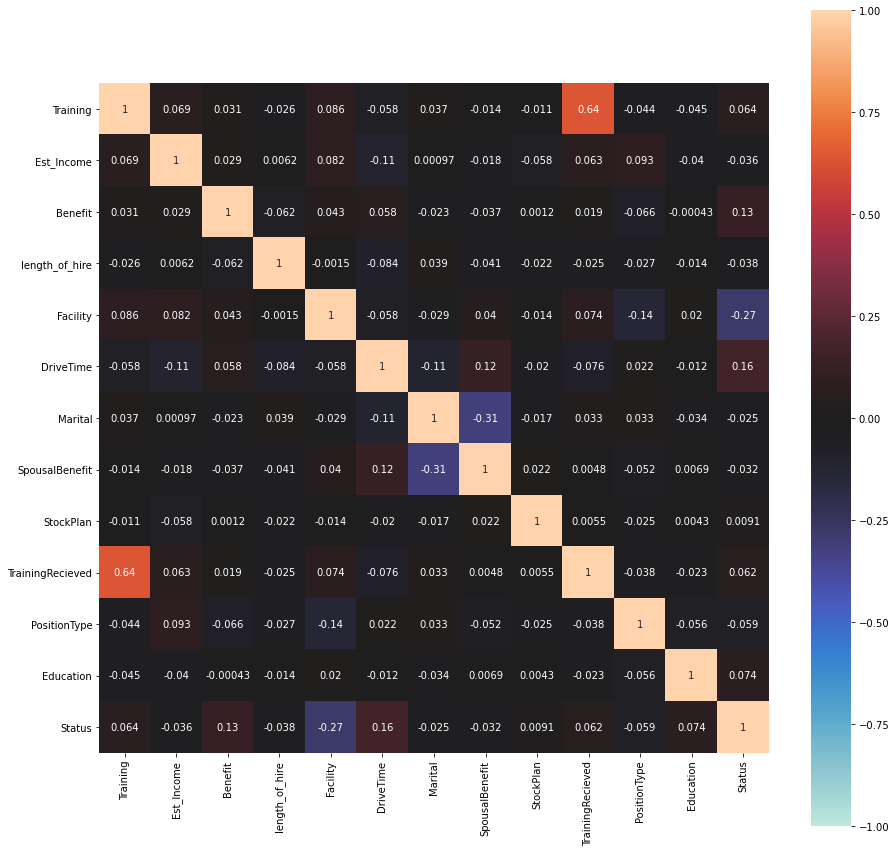

In [39]:
plt.rcParams["figure.figsize"] = (15,15)
sns.heatmap(corr ,  vmin= -1 , vmax =1, center = 0 ,  
            annot = True, square = True)
plt.show()
# Ploteamos la matriz de correlación

In [40]:
target = codifi1.pop('Status')
sc = StandardScaler()                           
model_norm = sc.fit(codifi1.loc[:])             
codifi1.loc[:] = model_norm.transform(codifi1.loc[:])

# Estandarizamos el dataframe    

In [41]:
df = pd.concat([codifi1,target],axis=1)
df.head()
# Lo visualizamos y verificamos

,Training,Est_Income,Benefit,length_of_hire,Facility,DriveTime,Marital,SpousalBenefit,StockPlan,TrainingRecieved,PositionType,Education,Status
0,1.377347,-0.887150,1.357731,1.375862,-1.195613,1.348469,-1.372257,2.262646,1.042959,-0.463797,0.564728,-1.297813,0
1,1.377347,-1.673820,-0.736523,0.651261,0.753606,-1.048126,-1.372257,2.262646,-0.958811,2.156114,0.564728,-1.297813,0
2,1.377347,-0.849226,1.357731,0.060458,0.753606,0.549604,-1.372257,2.262646,1.042959,2.156114,0.564728,1.380809,1
3,-0.726034,-0.664705,1.357731,-0.317711,-1.195613,1.348469,-1.372257,2.262646,-0.958811,-0.463797,0.564728,-1.297813,1
4,-0.726034,0.775300,-0.736523,-0.350400,-1.195613,1.348469,-1.372257,2.262646,1.042959,-0.463797,0.564728,0.487935,1


In [42]:
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = df.apply(stats.iqr)

df = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

df.shape

# Eliminamos los outliers del dataframe  

(995, 13)

<AxesSubplot:>

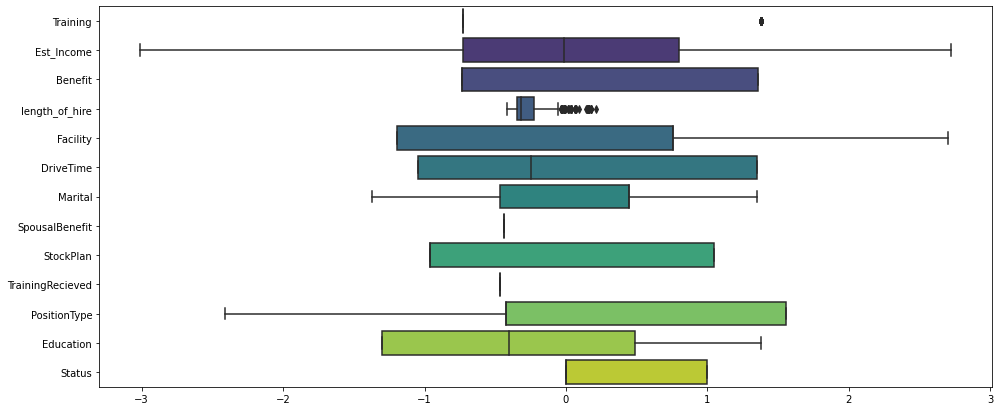

In [43]:
plt.figure(figsize=(16,7))
sns.boxplot(data=df.loc[:] , orient="h", palette="viridis")
# Ploteamos outliers según cada variable

In [44]:
X = df.drop('Status', axis=1)
y = df['Status']
X.head()

# Dividimos el dataframe en dos variables: 
# X contiene todas las columnas excepto la columna Status, nuestro target.
# Y contiene únicamente la columna Status  

,Training,Est_Income,Benefit,length_of_hire,Facility,DriveTime,Marital,SpousalBenefit,StockPlan,TrainingRecieved,PositionType,Education
210,-0.726034,-0.501398,1.357731,0.060458,0.753606,1.348469,-1.372257,-0.441961,1.042959,-0.463797,0.564728,-0.404939
211,-0.726034,1.502328,-0.736523,-0.346870,-1.195613,1.348469,-1.372257,-0.441961,-0.958811,-0.463797,0.564728,-0.404939
212,-0.726034,0.378198,-0.736523,-0.350400,-1.195613,1.348469,-1.372257,-0.441961,1.042959,-0.463797,0.564728,-1.297813
213,-0.726034,2.557850,-0.736523,-0.350400,-1.195613,1.348469,-1.372257,-0.441961,-0.958811,-0.463797,0.564728,-1.297813
214,-0.726034,-2.973920,1.357731,-0.370675,0.753606,-0.249261,-1.372257,-0.441961,-0.958811,-0.463797,-2.409779,-1.297813


## Super Vector Machine

In [45]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=27, shuffle=True)

# Dividimos los datos en 30% datos test y el resto en datos para entrenamiento 

In [46]:
def generate_svc():
    svc = svm.SVC(decision_function_shape='ovo')
    svc.fit(X_train, y_train)
    print ("svc score ", svc.score(X_test, y_test), "\n")
    return svc
# Realizamos la función de la Support Vector Machine. 

In [47]:
svc = generate_svc()
# Generamos la función y vemos el score que nos da

svc score  0.6956521739130435 



In [48]:
predict_svc = svc.predict(X_test)
predict_svc
# Utilizamos la función predict para predecir valores label a partir del modelo entrenado 
# Con la Support Vector Classification

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1], dtyp

In [49]:
def metricas_clf():
    # Creamos una función que nos permite ver las métricas del modelo       
    print(classification_report(y_test, predict_svc))

In [50]:
metricas_clf()

              precision    recall  f1-score   support

           0       0.83      0.66      0.73       191
           1       0.56      0.76      0.64       108

    accuracy                           0.70       299
   macro avg       0.69      0.71      0.69       299
weighted avg       0.73      0.70      0.70       299



<module 'matplotlib.pyplot' from 'C:\\Users\\puil\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

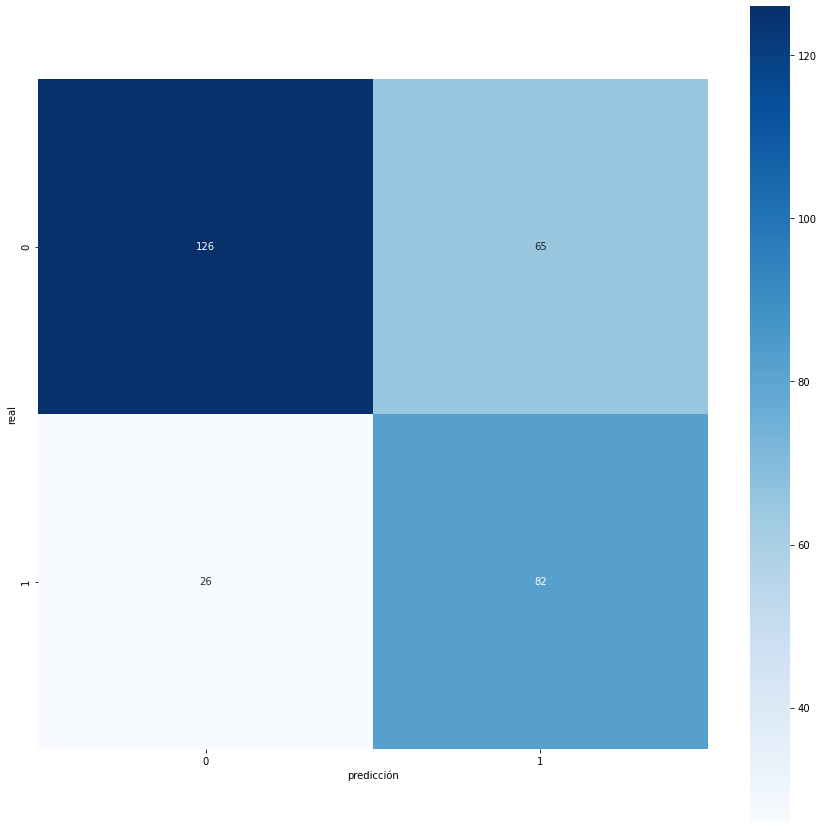

In [51]:
matrix = confusion_matrix(y_test, predict_svc)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicción")
plt.ylabel("real")
plt.rcParams['figure.figsize'] = [8, 8]
plt
# Ploteamos la matriz de confusión de nuestro modelo de SVM

In [52]:
performance_auc = {}
# Definimos la variable para la curva auc, que utilizaremos en cada uno de nuestros modelos

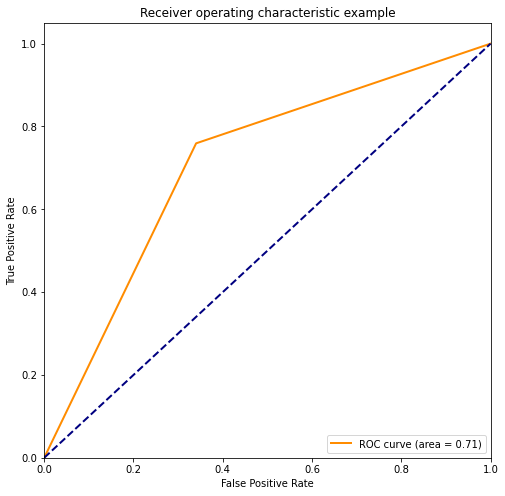

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, predict_svc)
roc_auc = auc(fpr, tpr)
performance_auc['SVM'] = roc_auc

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.rcParams['figure.figsize'] = [8, 8]
plt.show()
# Graficamos la SVM en la curva auc. Vemos que da un 74% de acierto

## KNN

In [54]:
def generate_knn():
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train,y_train)
    print ("knn score ", knn.score(X_test, y_test), "\n")
    return knn
# Generamos algoritmo de k-nearest neighbors

In [55]:
knn = generate_knn()
# Obtenemos el score

knn score  0.7190635451505016 



In [56]:
predict_knn = knn.predict(X_test)
predict_knn
# Obtenemos la predicción del KNN

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtyp

In [57]:
def metricas_knn():
    # Creamos una función que nos permite ver las métricas del modelo       
    print(classification_report(y_test, predict_knn))

In [58]:
metricas_knn()

              precision    recall  f1-score   support

           0       0.82      0.72      0.77       191
           1       0.59      0.71      0.65       108

    accuracy                           0.72       299
   macro avg       0.70      0.72      0.71       299
weighted avg       0.74      0.72      0.72       299



In [59]:
error_rate = []
# Quizá toma un tiempo
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

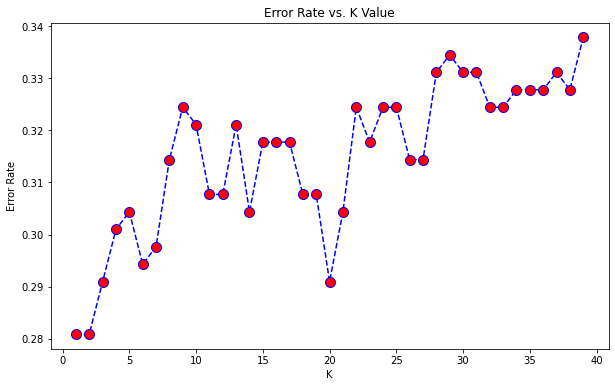

In [60]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
# Vemos la ratio de error, realacionada con los valores de la KNN

<module 'matplotlib.pyplot' from 'C:\\Users\\puil\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

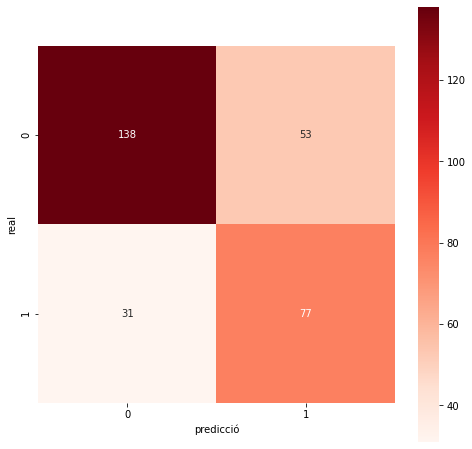

In [61]:
matrix3 = confusion_matrix(y_test, predict_knn)
sns.heatmap(matrix3, annot=True, fmt="d", cmap='Reds', square=True)
plt.xlabel("predicció")
plt.ylabel("real")
plt.rcParams['figure.figsize'] = [8, 8]
plt
# Matriz de confusión de la KNN

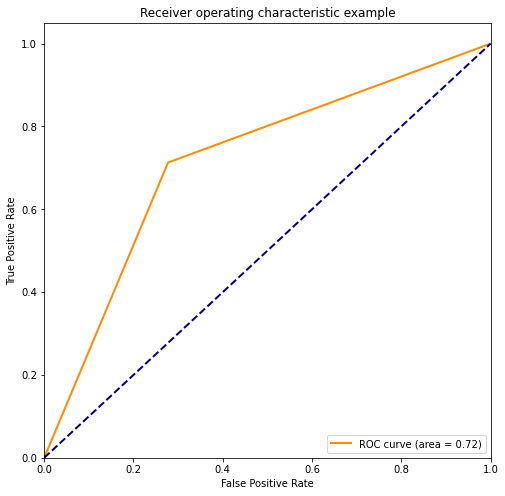

In [62]:
fpr, tpr, thresholds = roc_curve(y_test, predict_knn)
roc_auc4 = auc(fpr, tpr)
performance_auc['k-nearest neighbours'] = roc_auc4

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc4)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.rcParams['figure.figsize'] = [8, 8]
plt.show()
# Obtenemos un auc del 72%

## Ramdom Forest

In [63]:
def generate_rf():
    rf = RandomForestClassifier(n_estimators=50, min_samples_leaf=3, max_depth = 32)
    rf.fit(X_train, y_train)
    print ("rf score ", rf.score(X_test, y_test), "\n")
    # Creamos una función la cual ejecute el ramdom forest classifier    
    return rf

In [64]:
rf = generate_rf()
# Generamos el ramdom forest classifier con la función previamente creada   

rf score  0.7725752508361204 



In [65]:
predict_rf = rf.predict(X_test)
predict_rf
# Obtenemos la predicción del Random forest

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1], dtyp

In [66]:
def metricas_rf():
    # Creamos una función que nos permite ver las métricas del modelo       
    print(classification_report(y_test, predict_rf))

In [67]:
metricas_rf()

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       191
           1       0.66      0.76      0.71       108

    accuracy                           0.77       299
   macro avg       0.76      0.77      0.76       299
weighted avg       0.78      0.77      0.78       299



<module 'matplotlib.pyplot' from 'C:\\Users\\puil\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

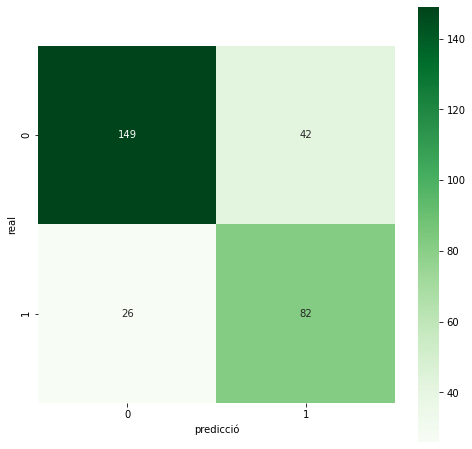

In [68]:
matrix3 = confusion_matrix(y_test, predict_rf)
sns.heatmap(matrix3, annot=True, fmt="d", cmap='Greens', square=True)
plt.xlabel("predicció")
plt.ylabel("real")
plt.rcParams['figure.figsize'] = [8, 8]
plt
# Matriz de confusión del Random Forest

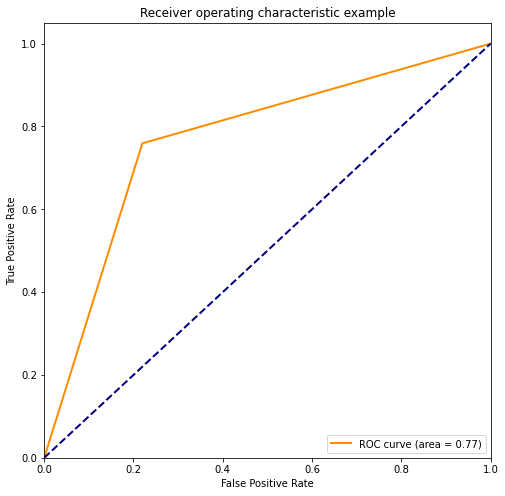

In [69]:
fpr, tpr, thresholds = roc_curve(y_test, predict_rf)
roc_auc = auc(fpr, tpr)
performance_auc['Random Forests'] = roc_auc

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.rcParams['figure.figsize'] = [8, 8]
plt.show()
# Ploteamos el AUC del Random Forest: 78%

In [70]:
# Guardamos los nombres de las columnas para su uso posterior        
df = df.drop(columns=["Status"])
feature_list = list(df.columns)


In [71]:
# Extraemos un árbol del ramdom forest         
tree = rf.estimators_[1]
# Exportamos la imagen a un dot file         
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Utilizamos la dot file para crear un grafico          
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Transformamos el formato del grafico a png           
graph.write_png('tree.png')

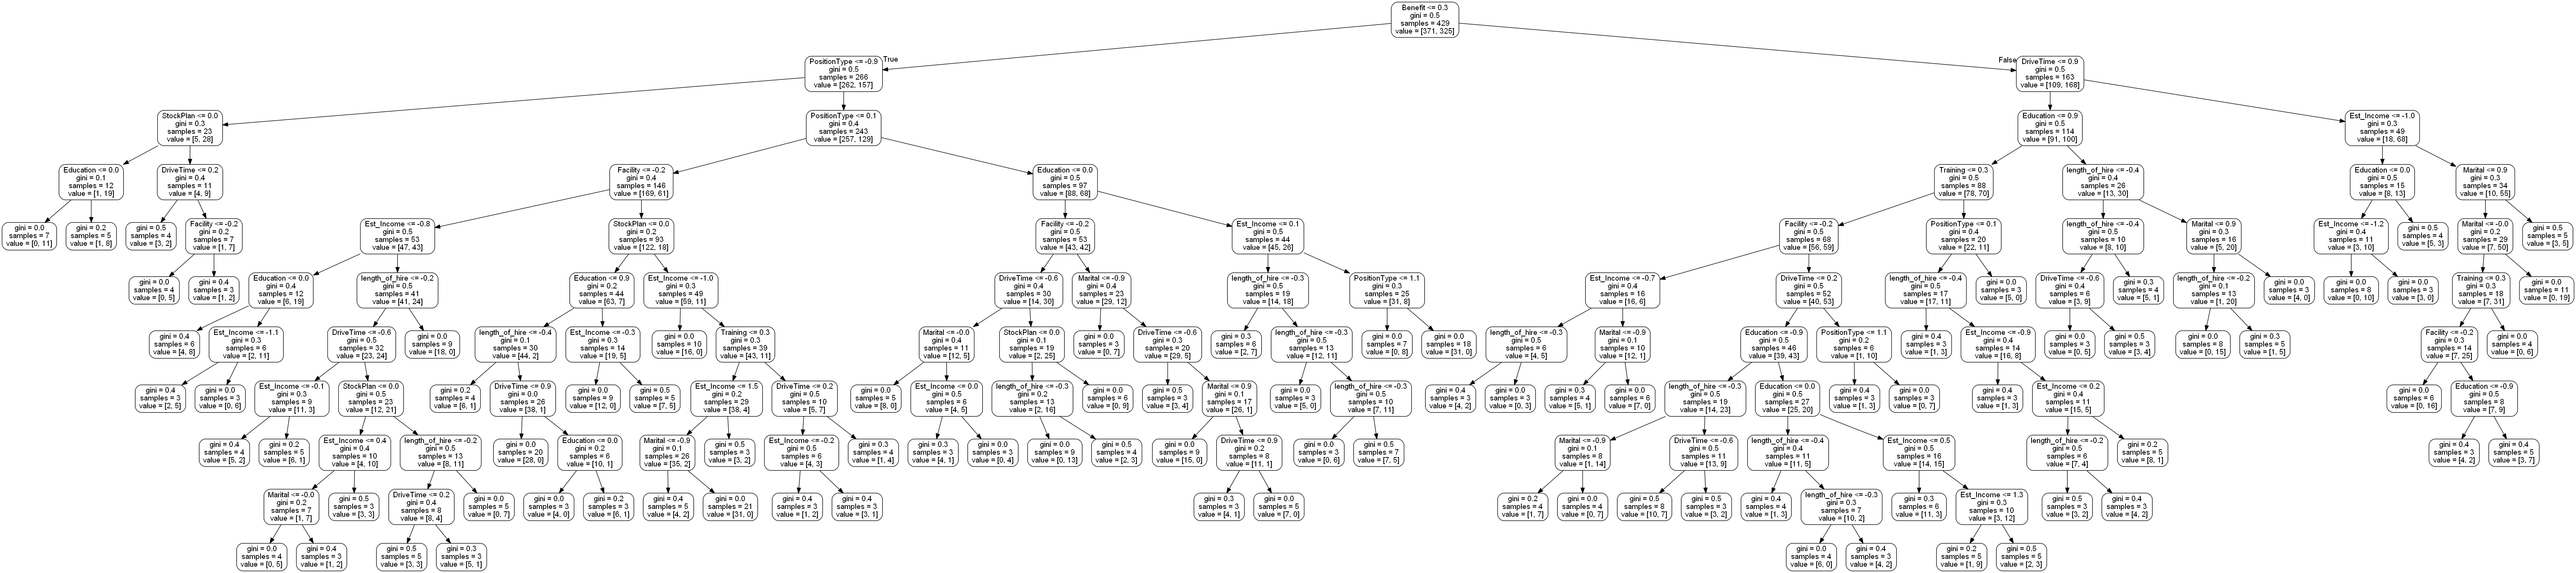

In [72]:
Image(filename = 'tree.png')

In [73]:
# Limit depth of tree to 3 levels
rf_small = RandomForestClassifier(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

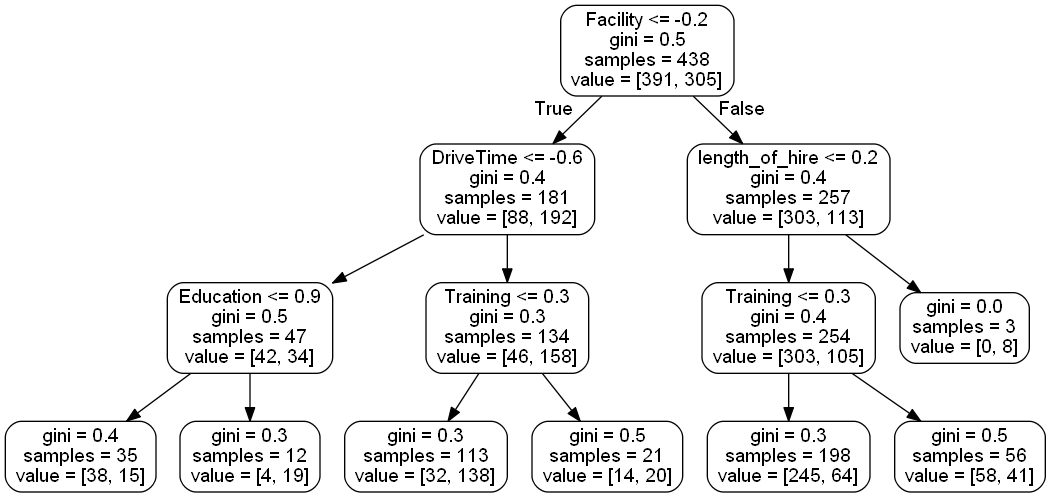

In [74]:
Image(filename = 'small_tree.png')

In [75]:
importances = list(rf.feature_importances_)
# Creamos una lista de tuplas con las variables y su importancia en el modelo            
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Realizamos un sort descendiente en función de la importancia de las variables                        
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: length_of_hire       Importance: 0.24
Variable: Est_Income           Importance: 0.19
Variable: Facility             Importance: 0.16
Variable: DriveTime            Importance: 0.09
Variable: Benefit              Importance: 0.08
Variable: PositionType         Importance: 0.08
Variable: Marital              Importance: 0.06
Variable: Education            Importance: 0.06
Variable: Training             Importance: 0.02
Variable: StockPlan            Importance: 0.02
Variable: SpousalBenefit       Importance: 0.0
Variable: TrainingRecieved     Importance: 0.0


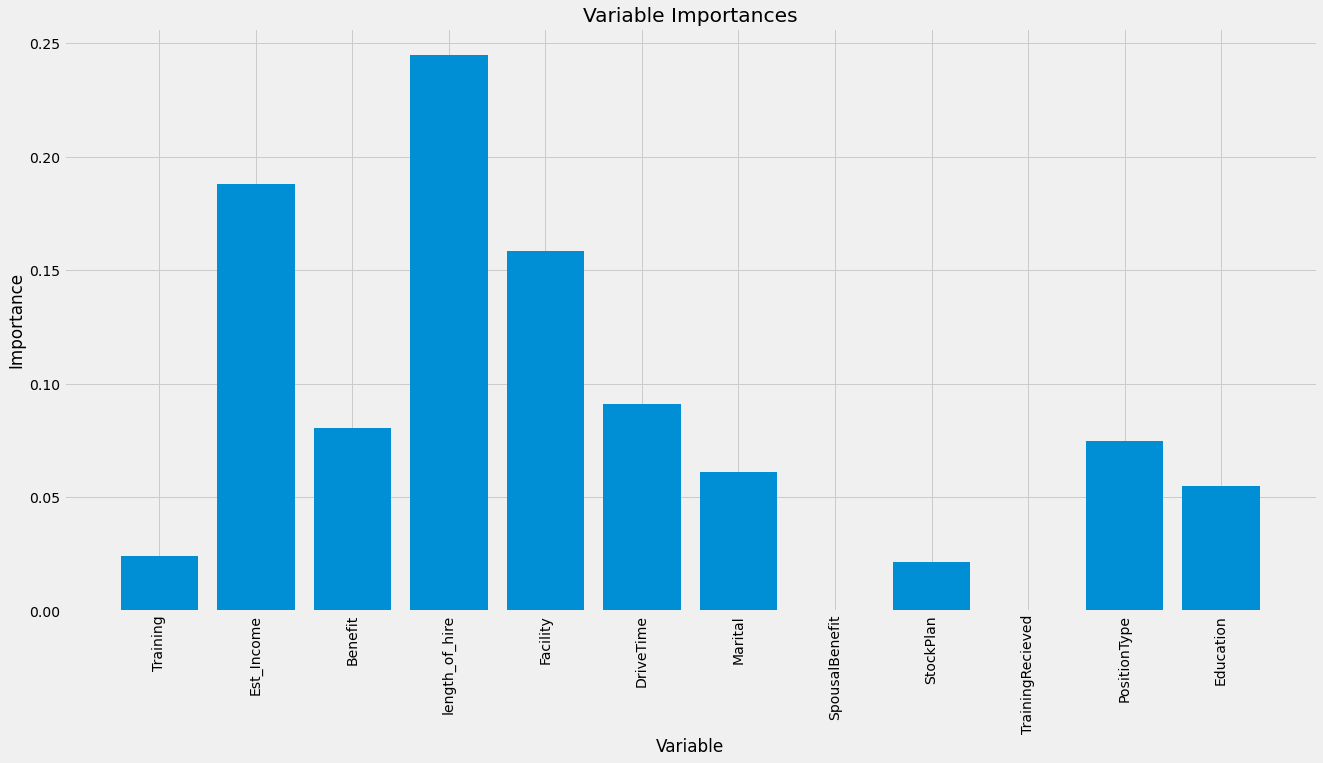

In [76]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)
plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### Resultados

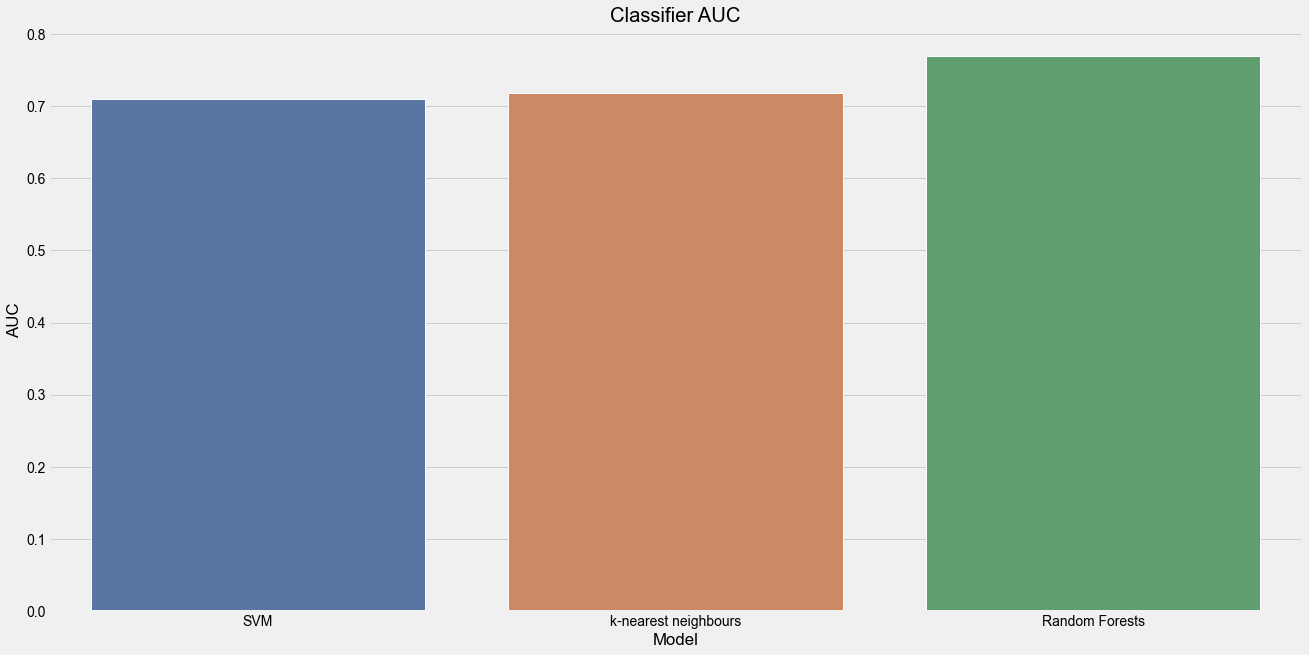

In [77]:
perf = pd.DataFrame.from_dict(performance_auc, orient='index')
perf['Model'] = perf.index
perf['AUC'] = perf[0]
plt.xlabel('AUC')
plt.title('Classifier AUC')
sns.set_theme(style="whitegrid")
sns.barplot(x= "Model", y='AUC', data=perf)
plt.rcParams['figure.figsize'] = [10, 4]
# Ploteamos de forma comparativa el AUC de los 3 modelos empleados

In [78]:
display(X_test)

,Training,Est_Income,Benefit,length_of_hire,Facility,DriveTime,Marital,SpousalBenefit,StockPlan,TrainingRecieved,PositionType,Education
1310,-0.726034,-0.475536,1.357731,-0.282765,0.753606,-1.048126,0.444867,-0.441961,1.042959,-0.463797,1.556230,0.487935
1419,1.377347,0.944944,-0.736523,-0.308866,-1.195613,1.348469,0.444867,-0.441961,1.042959,-0.463797,-1.418277,-1.297813
243,-0.726034,0.759584,-0.736523,-0.338345,0.753606,1.348469,-1.372257,-0.441961,-0.958811,-0.463797,1.556230,-0.404939
290,1.377347,0.701914,1.357731,0.162755,-1.195613,0.549604,-1.372257,-0.441961,1.042959,-0.463797,-0.426774,-1.297813
1131,-0.726034,1.748602,-0.736523,-0.302992,0.753606,-0.249261,-0.463695,-0.441961,1.042959,-0.463797,-0.426774,-1.297813
...,...,...,...,...,...,...,...,...,...,...,...,...
923,-0.726034,-1.880135,1.357731,-0.345034,-1.195613,-1.048126,-0.463695,-0.441961,-0.958811,-0.463797,1.556230,1.380809
1561,-0.726034,0.932462,-0.736523,-0.257495,0.753606,1.348469,0.444867,-0.441961,1.042959,-0.463797,-0.426774,-1.297813
1694,-0.726034,0.241694,-0.736523,-0.376792,0.753606,-0.249261,0.444867,-0.441961,1.042959,-0.463797,-0.426774,-1.297813
965,1.377347,0.883517,-0.736523,-0.209682,-1.195613,-1.048126,-0.463695,-0.441961,-0.958811,-0.463797,-1.418277,-1.297813


In [81]:
inversed = sc.inverse_transform(X_test)
inverted = pd.DataFrame(inversed, index=X_test.index, columns=X_test.columns).astype(int)
inverted

,Training,Est_Income,Benefit,length_of_hire,Facility,DriveTime,Marital,SpousalBenefit,StockPlan,TrainingRecieved,PositionType,Education
1310,0,66921,1,6,1,0,2,0,1,0,4,2
1419,1,90478,0,5,0,3,2,0,1,0,1,0
243,0,87404,0,4,1,3,0,0,0,0,4,1
290,1,86448,1,20,0,2,0,0,1,0,2,0
1131,0,103806,0,5,1,1,1,0,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
923,0,43627,1,4,0,0,1,0,0,0,4,3
1561,0,90271,0,7,1,3,2,0,1,0,2,0
1694,0,78815,0,3,1,1,2,0,1,0,2,0
965,1,89459,0,8,0,0,1,0,0,0,1,0


In [83]:
inversed = multi.inverse_transform(inverted)
inversed

,Training,Est_Income,Benefit,length_of_hire,Facility,DriveTime,Marital,SpousalBenefit,StockPlan,TrainingRecieved,PositionType,Education
1310,N,66921,Y,6,Facility B,0-30 mnts,Status Unknown,No,Yes,No,Supervisor / Lead Tech.,"Doctorate (PhD, EdD, etc)"
1419,Y,90478,N,5,Facility A,More than 90 mnts,Status Unknown,No,Yes,No,Executive Management,"Associate, High school, or Certification"
243,N,87404,N,4,Facility B,More than 90 mnts,Married,No,No,No,Supervisor / Lead Tech.,Baccalaureate or 4 year college degree
290,Y,86448,Y,20,Facility A,60-90 mnts,Married,No,Yes,No,Non-Managerial/ Professional,"Associate, High school, or Certification"
1131,N,103806,N,5,Facility B,30-60 mnts,Single,No,Yes,No,Non-Managerial/ Professional,"Associate, High school, or Certification"
...,...,...,...,...,...,...,...,...,...,...,...,...
923,N,43627,Y,4,Facility A,0-30 mnts,Single,No,No,No,Supervisor / Lead Tech.,Masters Degree
1561,N,90271,N,7,Facility B,More than 90 mnts,Status Unknown,No,Yes,No,Non-Managerial/ Professional,"Associate, High school, or Certification"
1694,N,78815,N,3,Facility B,30-60 mnts,Status Unknown,No,Yes,No,Non-Managerial/ Professional,"Associate, High school, or Certification"
965,Y,89459,N,8,Facility A,0-30 mnts,Single,No,No,No,Executive Management,"Associate, High school, or Certification"


In [84]:
inverted = pd.DataFrame(inversed, index=X_test.index, columns=X_test.columns)
inverted

,Training,Est_Income,Benefit,length_of_hire,Facility,DriveTime,Marital,SpousalBenefit,StockPlan,TrainingRecieved,PositionType,Education
1310,N,66921,Y,6,Facility B,0-30 mnts,Status Unknown,No,Yes,No,Supervisor / Lead Tech.,"Doctorate (PhD, EdD, etc)"
1419,Y,90478,N,5,Facility A,More than 90 mnts,Status Unknown,No,Yes,No,Executive Management,"Associate, High school, or Certification"
243,N,87404,N,4,Facility B,More than 90 mnts,Married,No,No,No,Supervisor / Lead Tech.,Baccalaureate or 4 year college degree
290,Y,86448,Y,20,Facility A,60-90 mnts,Married,No,Yes,No,Non-Managerial/ Professional,"Associate, High school, or Certification"
1131,N,103806,N,5,Facility B,30-60 mnts,Single,No,Yes,No,Non-Managerial/ Professional,"Associate, High school, or Certification"
...,...,...,...,...,...,...,...,...,...,...,...,...
923,N,43627,Y,4,Facility A,0-30 mnts,Single,No,No,No,Supervisor / Lead Tech.,Masters Degree
1561,N,90271,N,7,Facility B,More than 90 mnts,Status Unknown,No,Yes,No,Non-Managerial/ Professional,"Associate, High school, or Certification"
1694,N,78815,N,3,Facility B,30-60 mnts,Status Unknown,No,Yes,No,Non-Managerial/ Professional,"Associate, High school, or Certification"
965,Y,89459,N,8,Facility A,0-30 mnts,Single,No,No,No,Executive Management,"Associate, High school, or Certification"


In [ ]:
inverted.to_excel(r'C:\Users\puil\OneDrive\Escritorio\6.7\inverted.xlsx', index = False)

In [ ]:
# Exportamos a excel los resultados obtenidos de los 3 algoritmos empleados
predict_rf = pd.DataFrame(predict_rf, columns=  ["Valores Predichos"])
predict_rf["id"] = id
predict_rf.to_excel(r'C:\Users\puil\OneDrive\Escritorio\6.7\resultados_rf.xlsx', index = False)

In [ ]:
predict_knn = pd.DataFrame(predict_knn, columns=  ["Valores Predichos"])
predict_knn["id"] = id
predict_knn.to_excel(r'C:\Users\puil\OneDrive\Escritorio\6.7\resultados_knn.xlsx', index = False)

In [ ]:
predict_svc = pd.DataFrame(predict_svc, columns=  ["Valores Predichos"])
predict_svc["id"] = id
predict_svc.to_excel(r'C:\Users\puil\OneDrive\Escritorio\6.7\resultados_svc.xlsx', index = False)